# Task 3: House Price Prediction

In [3]:
x_values = [1400, 1600, 1700, 1875, 1100, 1550, 2350, 2450, 1425, 1700]
y_values = [245, 312, 279, 308, 199, 219, 405, 324, 319, 255]

The training set is very small, hence it is not feasible to train any large ML model from this dataset. The first step I would do is to plot the x and y values, see how y increases with the growth of x (e.g., proportionally or exponentially), and then decide how to fit the data.

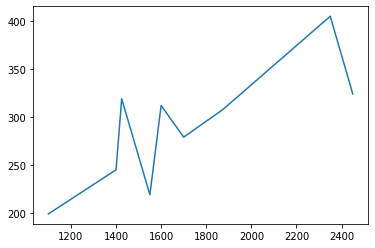

In [4]:
# plot x and y, see how y increases with y 
sorted_idx = [x_values.index(xv) for xv in sorted(x_values)]
plot_y = [y_values[i] for i in sorted_idx]
import matplotlib.pyplot as plt
plt.plot(sorted(x_values), plot_y)

From the plot above I find y increases linearlly or sublinearly with x. Hence I will try three functions to perform regression: linear functions (y = wx+b), log-linear functions (y = log(wx+b)), and saturation-growth-rate function (y = ax/(bx+c)). I will measure the 'goodness of fitness' of these three functions, by *mean absolute errors (MAEs)* and *rooted mean square errors (RMSEs)*.

predicted y values: [251.92316258 273.87671015 284.85348393 304.06283805 218.99284123
 268.38832326 356.20251352 367.17928731 254.66735603 284.85348393]
RMSE: 36.96696528565469
MAE: 31.03811644925231


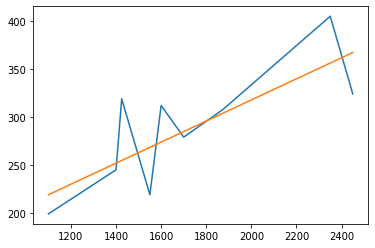

In [5]:
# linear function regression 
import numpy as np
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(np.array(x_values).reshape(-1,1), np.array(y_values))
pred_y = reg.predict(np.array(x_values).reshape(-1,1))
print('predicted y values:',pred_y)

# get RMSE and MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error
print('RMSE:',mean_squared_error(y_values, pred_y, squared=False))
print('MAE:',mean_absolute_error(y_values, pred_y))

# plot original y and predicted y values
plot_pred_y = [pred_y[i] for i in sorted_idx]
plt.plot(sorted(x_values), plot_y, sorted(x_values), plot_pred_y)

RMSE: 36.71892512895534
MAE: 29.977038747829987


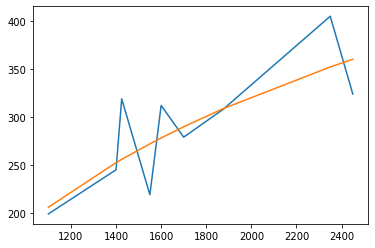

In [6]:
# log-linear function regression
log_x = np.log(np.array(x_values))
reg = LinearRegression().fit(np.array(log_x).reshape(-1,1), np.array(y_values))
pred_y = reg.predict(np.array(log_x).reshape(-1,1))

# get RMSE and MAE
print('RMSE:',mean_squared_error(y_values, pred_y, squared=False))
print('MAE:',mean_absolute_error(y_values, pred_y))

# plot original y and predicted y values
plot_pred_y = [pred_y[i] for i in sorted_idx]
plt.plot(sorted(x_values), plot_y, sorted(x_values), plot_pred_y)

[0.00071429 0.000625   0.00058824 0.00053333 0.00090909 0.00064516
 0.00042553 0.00040816 0.00070175 0.00058824]
RMSE: 36.98462382664428
MAE: 29.291242723368043


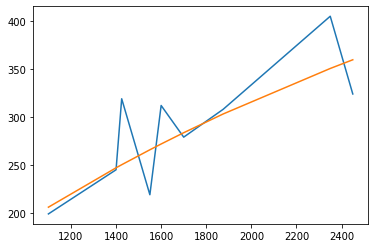

In [7]:
# saturation-growth-rate function regression
inverse_x = 1./np.array(x_values)
inverse_y = 1./np.array(y_values)
print(inverse_x)
reg = LinearRegression().fit(inverse_x.reshape(-1,1), inverse_y)
pred_y = reg.predict(inverse_x.reshape(-1,1))
pred_y = 1./pred_y

# get RMSE and MAE
print('RMSE:',mean_squared_error(y_values, pred_y, squared=False))
print('MAE:',mean_absolute_error(y_values, pred_y))

# plot original y and predicted y values
plot_pred_y = [pred_y[i] for i in sorted_idx]
plt.plot(sorted(x_values), plot_y, sorted(x_values), plot_pred_y)

## Analysis
I made the following observations.

* All three regression algorithms yield very similar performance. 
* Given that said, log-linear regression and saturation-growth-rate (SGR) yeild better performance than linear regression in terms of both MAE and RMSE, suggesting that they have better goodness of fit than linear regression.
* As for SGR and log-linear regression, log-linear has lower RMSE, while SGR has lower MAE. It is widely known that RMSE is more 'sensitive' to outliners, i.e. if there exist some points significantly away from the fitted curve, RMSE increases more quickly than MAE. Hence, if we want to avoid outliners, we should go for the log-linear regression model; otherwise, we could go for SGR model as it yields smaller absolute errors on average.